# German Credit

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_csv("German Credit Dataset.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
credit.select_dtypes(include = 'object')

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes,no
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,yes
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no,yes
...,...,...,...,...,...,...,...,...,...,...
995,unknown,good,furniture/appliances,< 100 DM,4 - 7 years,none,own,unskilled,no,no
996,< 0 DM,good,car,< 100 DM,1 - 4 years,none,own,management,yes,no
997,unknown,good,furniture/appliances,< 100 DM,> 7 years,none,own,skilled,no,no
998,< 0 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,other,skilled,yes,yes


In [4]:
for i in credit.select_dtypes(include = 'object').columns:
    
       print('-'*10,i,'-'*10,'\n\n',credit[i].value_counts(),'\n')

---------- checking_balance ---------- 

 unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

---------- credit_history ---------- 

 good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

---------- purpose ---------- 

 furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

---------- savings_balance ---------- 

 < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

---------- employment_duration ---------- 

 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 

---------- other_credit ---------- 

 none     814
bank     139
store     47
Name: other

In [5]:
['checking_balance', 'savings_balance', 'employment_duration' ]

['checking_balance', 'savings_balance', 'employment_duration']

In [6]:
credit_df = credit.copy()

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
credit_df['purpose'] = np.where(credit_df['purpose']== 'furniture/appliances','appliances', credit_df['purpose'])

In [9]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [10]:
data_correction = ['checking_balance','savings_balance','employment_duration']
def count_size():
    dict = {}
    for i in data_correction:
        x = credit_df[i].value_counts().index.size
        dict.update({i:x})
    return(dict)

#x = count_size()
#print(x, type(x))

for i in data_correction:
    x = count_size()
    if x[i]==4:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,3)) )
    elif x[i]==5:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,
                        np.where(credit_df[i]== credit_df[i].value_counts().index[3],3,4))) )
          

In [11]:
for i in credit_df.select_dtypes(include = 'object').columns:
    
       print('-'*10,i,'-'*10,'\n\n',credit_df[i].value_counts(),'\n')

---------- credit_history ---------- 

 good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

---------- purpose ---------- 

 appliances     473
car            337
business        97
education       59
renovations     22
car0            12
Name: purpose, dtype: int64 

---------- other_credit ---------- 

 none     814
bank     139
store     47
Name: other_credit, dtype: int64 

---------- housing ---------- 

 own      713
rent     179
other    108
Name: housing, dtype: int64 

---------- job ---------- 

 skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64 

---------- phone ---------- 

 no     596
yes    404
Name: phone, dtype: int64 

---------- default ---------- 

 no     700
yes    300
Name: default, dtype: int64 



In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   int32 
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   int32 
 6   employment_duration   1000 non-null   int32 
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

# Outlier

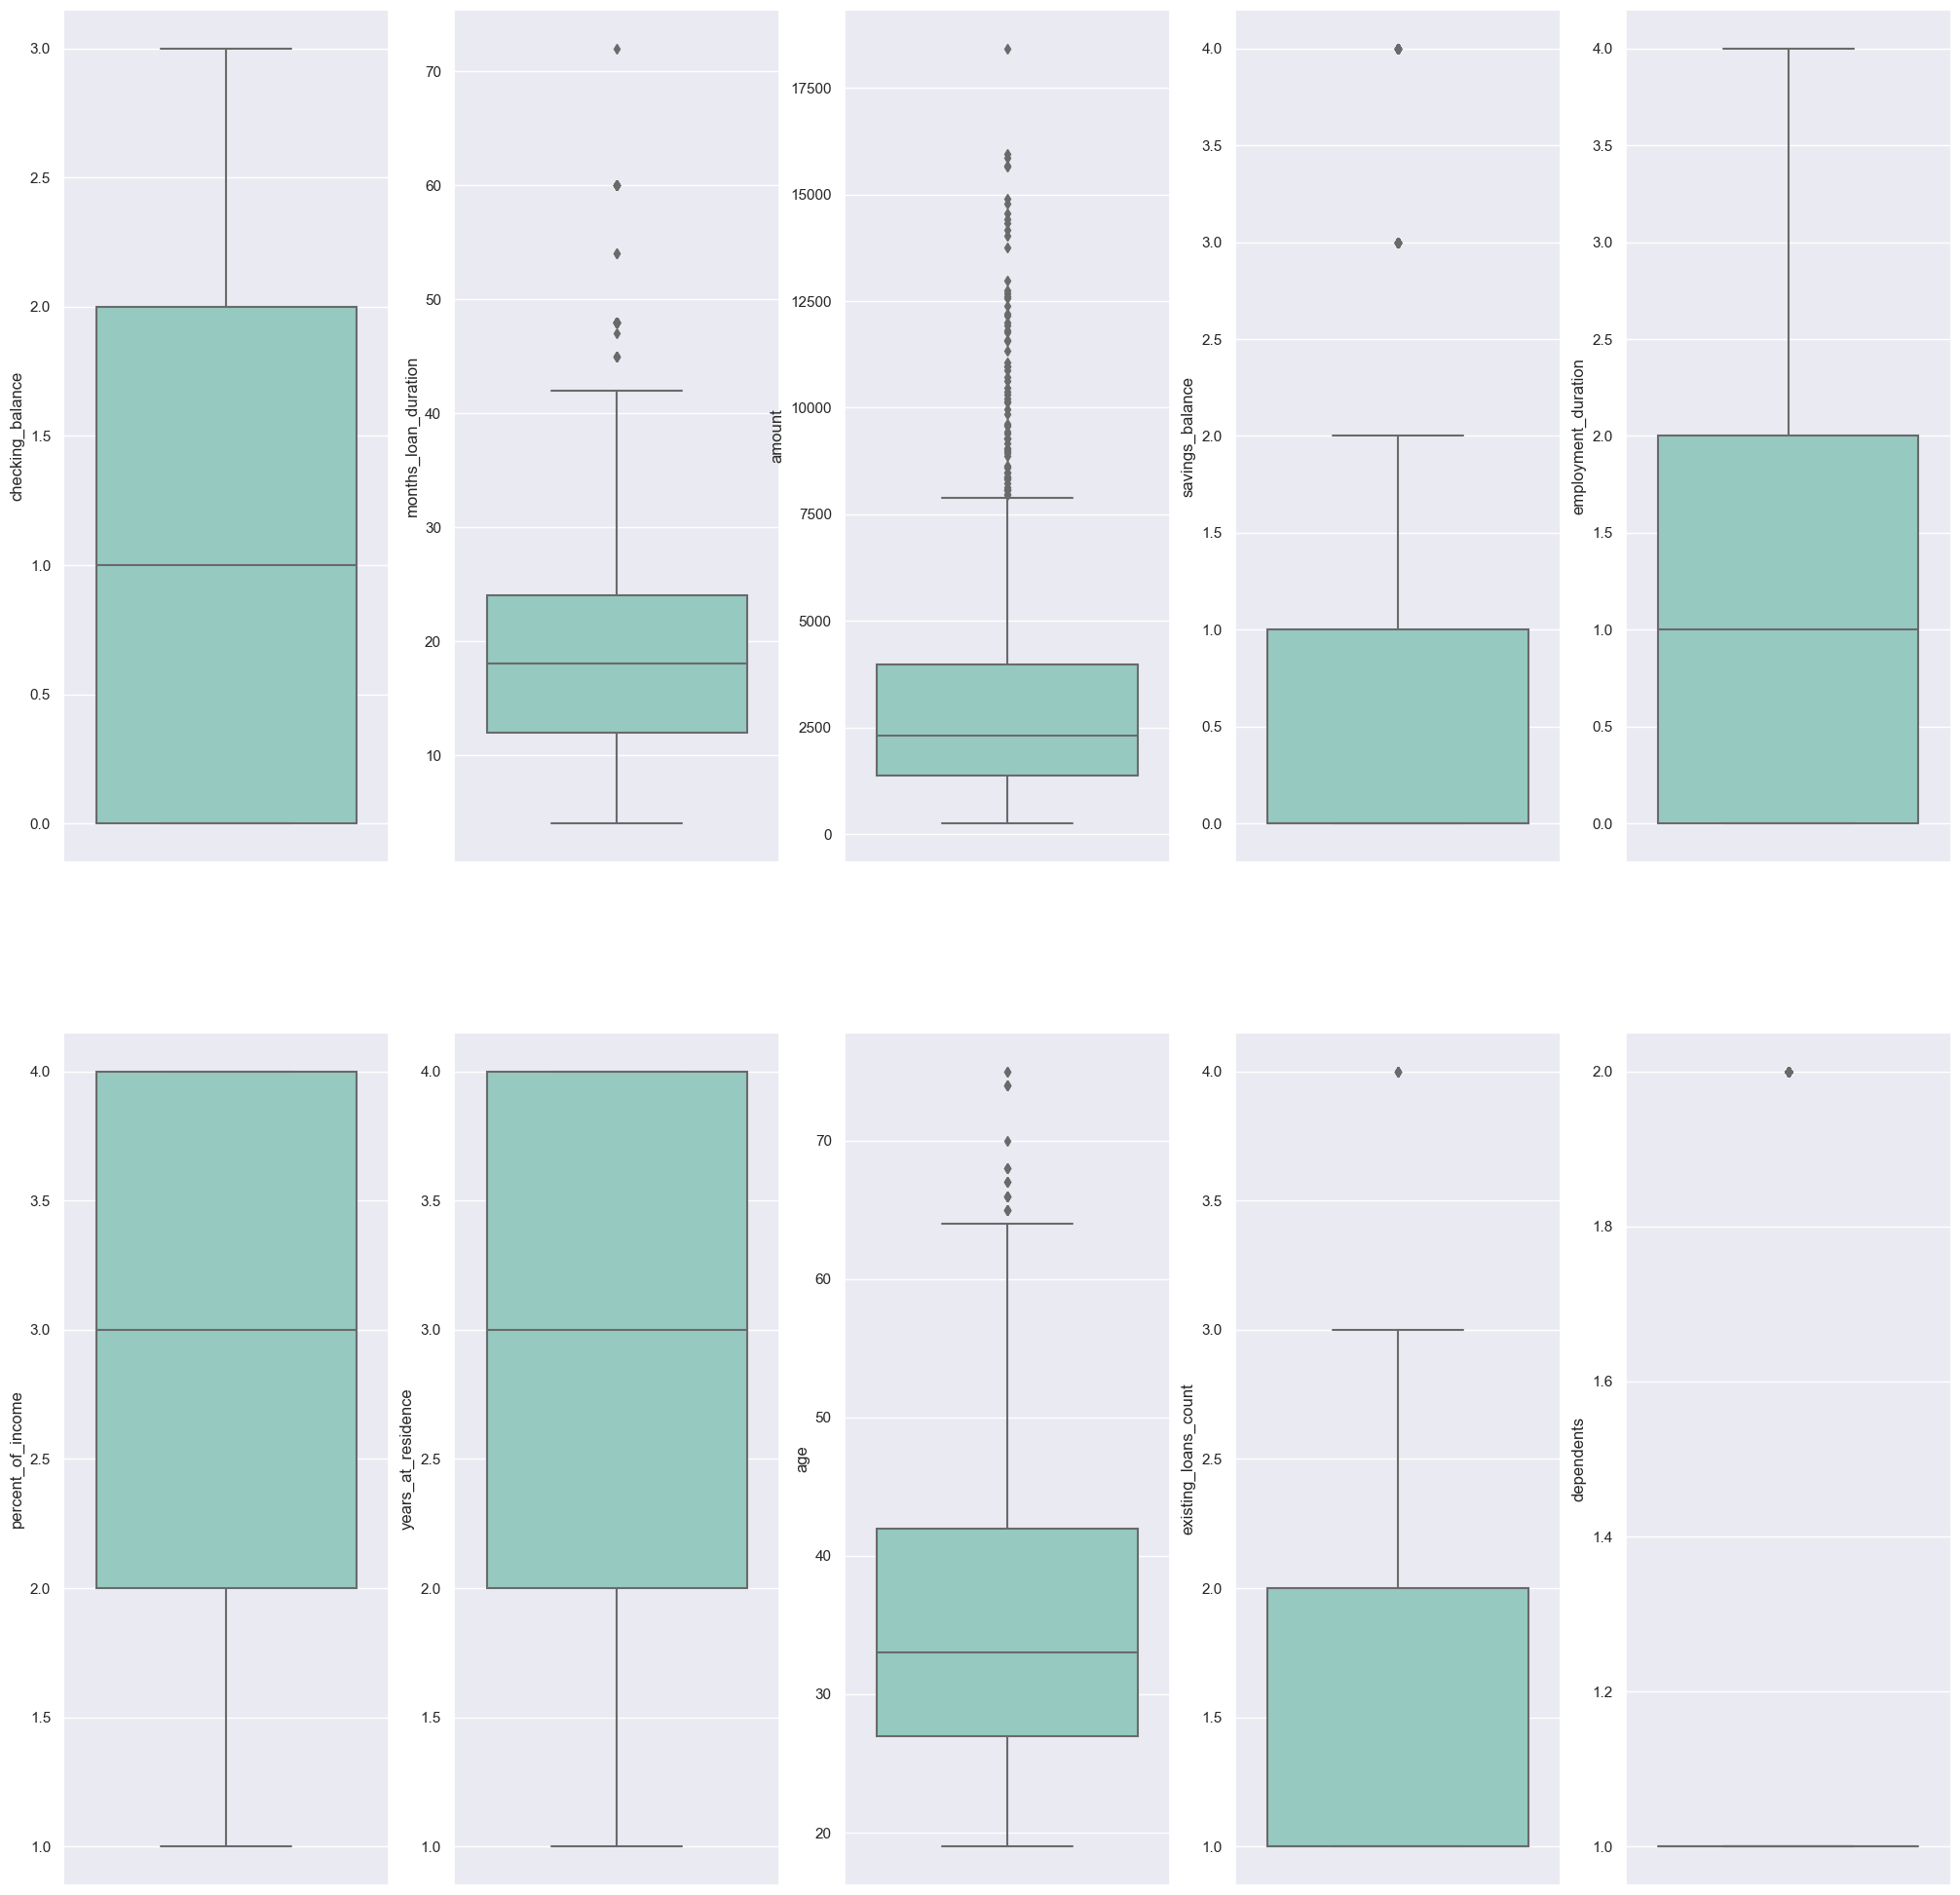

In [13]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')    

In [14]:
q1 = credit_df.quantile(0.25)
q3 = credit_df.quantile(0.75)
IQR = q3-q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

dict1 = {}
dict2 = {}
quant_list = []

dict1.update(upper_limit)
dict2.update(lower_limit)
quant_list.append(dict1)
quant_list.append(dict2)

limit = pd.DataFrame(quant_list).T
limit.columns = ['upper_limit', 'lower_limit']
limit

,upper_limit,lower_limit
checking_balance,5.000,-3.000
months_loan_duration,42.000,-6.000
amount,7882.375,-2544.625
savings_balance,2.500,-1.500
employment_duration,5.000,-3.000
percent_of_income,7.000,-1.000
years_at_residence,7.000,-1.000
age,64.500,4.500
existing_loans_count,3.500,-0.500
dependents,1.000,1.000


In [15]:
credit_df['amount'].clip(upper = 7882 ,inplace=True)

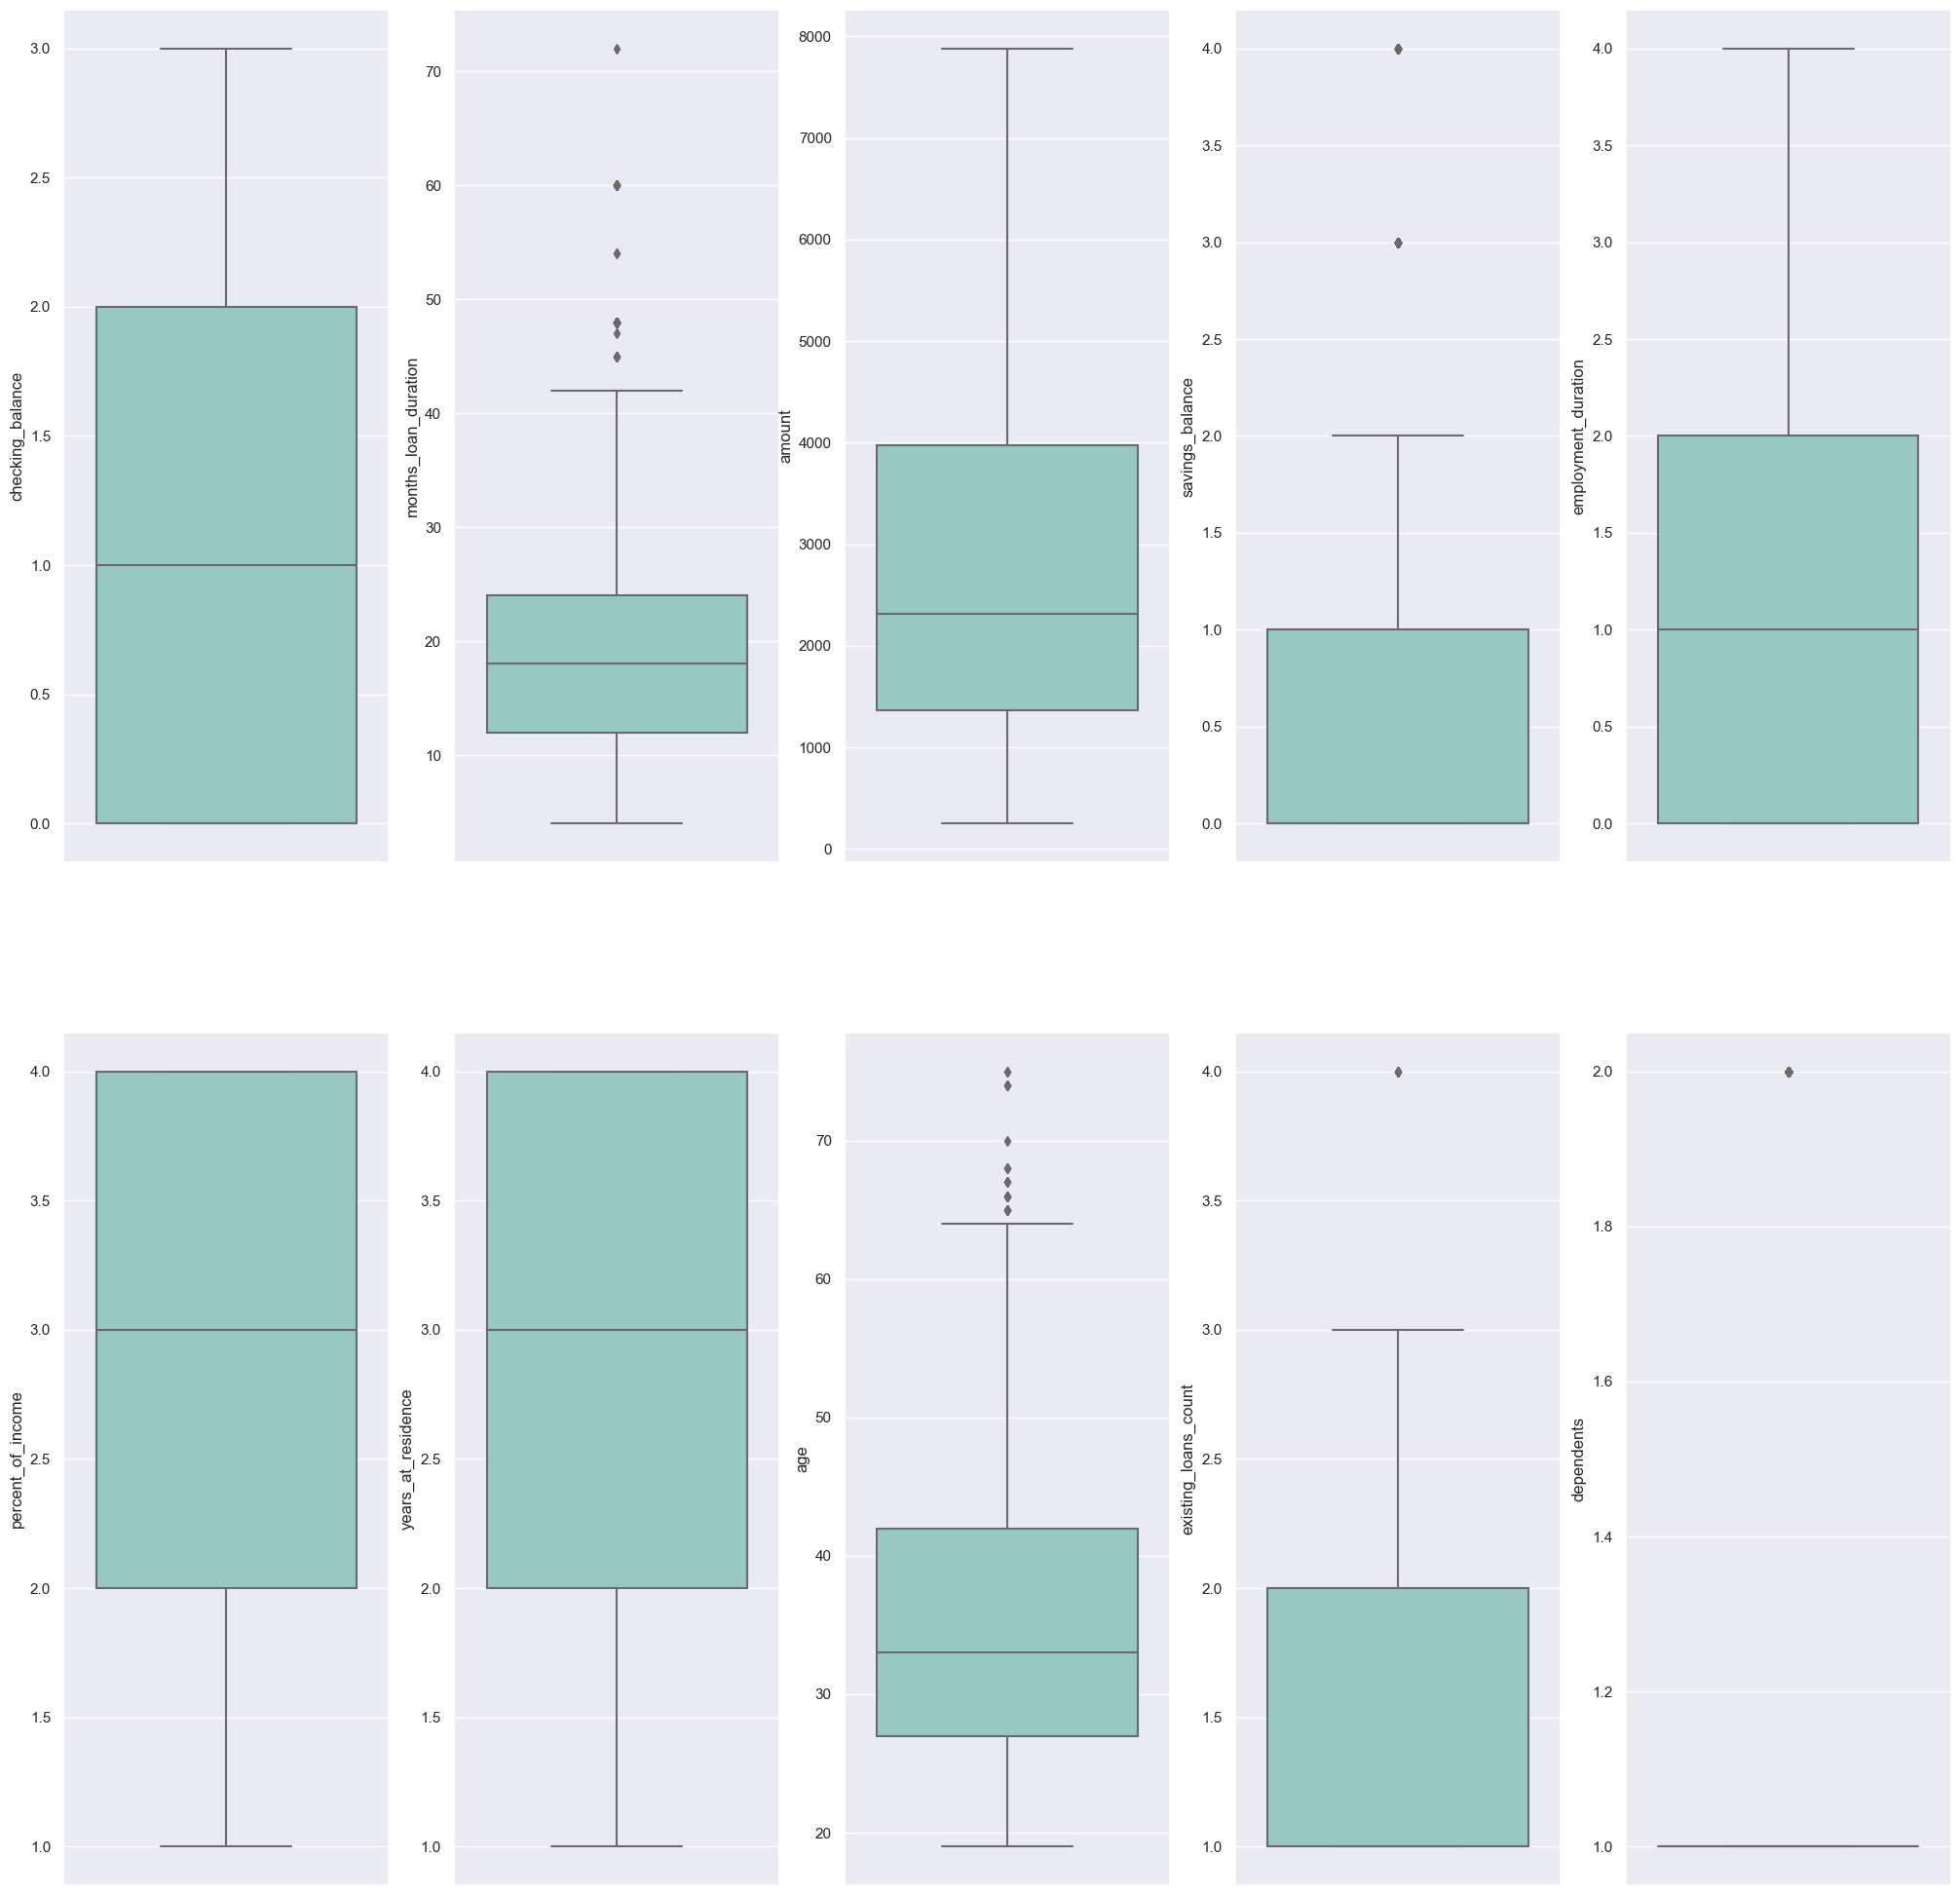

In [16]:
plt.figure(figsize = (25, 25), dpi = 100)

for x, col in enumerate(credit_df.select_dtypes(include = 'int').columns):
    plt.subplot(2,5,x + 1)
    sns.boxplot(y = credit_df[col], data=credit_df, palette = 'Set3')   

In [17]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   int32 
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   int32 
 6   employment_duration   1000 non-null   int32 
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

# Encoding

In [18]:
credit_df = pd.get_dummies(credit_df, columns = credit_df.select_dtypes(include = 'object').columns,drop_first =True )

In [19]:
credit_df.head()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,...,purpose_renovations,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,1,6,1169,1,1,4,4,67,2,1,...,0,1,0,1,0,1,0,0,1,0
1,2,48,5951,0,0,2,2,22,1,1,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,0,2,2,3,49,1,2,...,0,1,0,1,0,0,0,1,0,0
3,1,42,7882,0,2,2,4,45,1,2,...,0,1,0,0,0,1,0,0,0,0
4,1,24,4870,0,0,3,4,53,2,2,...,0,1,0,0,0,1,0,0,0,1


In [20]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   checking_balance          1000 non-null   int32
 1   months_loan_duration      1000 non-null   int64
 2   amount                    1000 non-null   int64
 3   savings_balance           1000 non-null   int32
 4   employment_duration       1000 non-null   int32
 5   percent_of_income         1000 non-null   int64
 6   years_at_residence        1000 non-null   int64
 7   age                       1000 non-null   int64
 8   existing_loans_count      1000 non-null   int64
 9   dependents                1000 non-null   int64
 10  credit_history_good       1000 non-null   uint8
 11  credit_history_perfect    1000 non-null   uint8
 12  credit_history_poor       1000 non-null   uint8
 13  credit_history_very good  1000 non-null   uint8
 14  purpose_business          1000 non-null  

# Feature Scaling

In [66]:
x = credit_df.drop(['default_yes'], axis=1)
y = credit_df['default_yes']

In [67]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.001045,-1.236478,-0.860972,0.198905,-0.286261,0.918477,1.046987,2.766456,1.027079,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,1.214598
1,1.044372,2.248194,1.326598,-0.665900,-1.070539,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318
2,-1.046463,-0.738668,-0.436907,-0.665900,0.498016,-0.870183,0.140505,1.183312,-0.704926,2.334869,...,3.993639,-0.149983,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318
3,-0.001045,1.750384,2.209952,-0.665900,0.498016,-0.870183,1.046987,0.831502,-0.704926,2.334869,...,-0.250398,-0.149983,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318
4,-0.001045,0.256953,0.832085,-0.665900,-1.070539,0.024147,1.046987,1.535122,1.027079,2.334869,...,-0.250398,-0.149983,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,-0.823318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.046463,-0.738668,-0.601593,-0.665900,0.498016,0.024147,1.046987,-0.399832,-0.704926,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,2.0,-0.823318
996,-0.001045,0.754763,0.368678,-0.665900,-1.070539,0.918477,1.046987,0.391740,-0.704926,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,0.634448,-0.466933,-1.304877,-0.149983,-0.5,1.214598
997,-1.046463,-0.738668,-1.027945,-0.665900,-0.286261,0.918477,1.046987,0.215835,-0.704926,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,0.634448,-0.466933,0.766356,-0.149983,-0.5,-0.823318
998,-0.001045,1.999289,-0.551730,-0.665900,-1.070539,0.918477,1.046987,-1.103451,-0.704926,-0.428290,...,-0.250398,-0.149983,0.478018,-0.222076,-1.576173,-0.466933,0.766356,-0.149983,-0.5,1.214598


# Imbalance Data

In [60]:
y.value_counts()

0    700
1    300
Name: default_yes, dtype: int64

## OverSampling

In [34]:
import imblearn

In [61]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(sc_x, y)
print(x_sam.shape, y_sam.shape)

(1400, 27) (1400,)


# Model Building`

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size = 0.25, random_state =100, stratify=y_sam)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1050, 27) (350, 27) (1050,) (350,)


In [107]:
dict_model = {'Logestic Regression':LogisticRegression(),'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', max_depth = 6 ), 
              'Bagging': BaggingClassifier(max_features = 6), 'Random Forest':RandomForestClassifier(criterion = 'entropy', max_depth = 6, oob_score = True )  }

def cross_validation(model):
    Training_CV = cross_val_score(model, x_train, y_train, cv =10).mean()
    Testing_CV = cross_val_score(model, x_test, y_test, cv= 10).mean()
    return Training_CV, Testing_CV

d = {}

for i in list(dict_model.keys()):
    #print('='*10,i,'='*10,'\n')
    mdl = dict_model[i]
    model = mdl.fit(x_train, y_train)
    #print(model,'\n')
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_predict_train)
    test_acc = accuracy_score(y_test, y_predict_test)
    d.setdefault(i,[]).append(train_acc)
    d.setdefault(i,[]).append(test_acc)
    x, y = cross_validation(model)
    d.setdefault(i,[]).append(x)
    d.setdefault(i,[]).append(y)
    acc_diff = abs(train_acc - test_acc)*100
    CV_acc_diff = abs(x - y)*100
    d.setdefault(i,[]).append(acc_diff)
    d.setdefault(i,[]).append(CV_acc_diff)

pd.DataFrame(d , index = ['Train Accuracy', 'Test Accuracy', 'CV Train Accuracy', 'CV Test Accuracy','acc_diff', 'CV_acc_diff'] ).T
    #print(f'Train accuracy score: {train_acc}\nTest accuracy score: {test_acc}\n\n')

,Train Accuracy,Test Accuracy,CV Train Accuracy,CV Test Accuracy,acc_diff,CV_acc_diff
Logestic Regression,0.694286,0.725714,0.670476,0.720000,3.142857,4.952381
Decision Tree,0.780952,0.722857,0.713333,0.691429,5.809524,2.190476
Bagging,0.957143,0.794286,0.786667,0.665714,16.285714,12.095238
Random Forest,0.837143,0.785714,0.756190,0.734286,5.142857,2.190476


In [99]:
rf = RandomForestClassifier(n_estimators , criterion = 'entropy', max_depth = 6, oob_score = True )
rf_model = rf.fit(x_train, y_train)
rf_model

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       oob_score=True)

In [100]:
y_tn_predict  = rf_model.predict(x_train)
y_ts_predict = rf_model.predict(x_test)

In [101]:
accuracy_score(y_train,y_tn_predict)

0.8485714285714285

In [102]:
accuracy_score(y_test,y_ts_predict)

0.78

In [ ]:
#(pd.DataFrame(rf_model.feature_importances_, index = x.columns, columns = ['Feature_importance'])).sort_values(by = 'Feature_importance', ascending = False)